<a href="https://colab.research.google.com/github/mehmetalianil/epoch-15/blob/master/First%20Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First day

This day, we are going to do the following: 
* If not done yet, we need to sort out some prerequisites.
* We are going to generate a dataset of hand gestures, together.
* We might spend some time to gather and preprocess the data. (Never underestimate time spent for data-prep)
* Then we will start a Tensorflow session, and try to solve a classification problem of classifying these gestures correctly.

## Resources
* Arduino IDE download link https://www.arduino.cc/en/Main/Software
* Linux CH340 drivers patching guide https://learn.sparkfun.com/tutorials/how-to-install-ch340-drivers/all#linux
* Upload point for generated data: https://drive.google.com/drive/folders/138hSEWZyePWepjaOIrhxuYEvBwqLl2PM?usp=sharing
* A VERY helpful Colab written by François Chollet, developer of KERAS https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO
* Some numpy/pandas commands that might be useful https://elitedatascience.com/python-cheat-sheet

## Introduction

*There might be new faces in this session, therefore I would like to write an introduction.*

I am Mehmet Ali Anil, co-founder of Grus in High Tech Campus. I am a electrical engineer and physicist with particular interest on biologically inspired systems for a while now. Here are the places that you can contact me and read things I write: 

* Github https://github.com/mehmetalianil
* StackOverflow https://stackexchange.com/users/462542/mehmet-ali-anil
* LinkedIn https://www.linkedin.com/in/mehmetalianil/
* Our blog https://blog.grusbv.com/
* Twitter https://twitter.com/maanil_ee 
* Podcast {{Work In Progress}}

## Why microcontrollers? Isn't ML the job for, like endless server farms?
It doesn't have to be. It might have been a bad idea before, but the unexpected success of deep learning on specific problems has laid the groundwork for its widespread applicability. And systems with small resources, given a small problem to solve excel in applications that require: 

* Autonomy
* Privacy
* Speed (as in latency)
* Energy efficiency

In short, life is what is here and now, and why not solve problems where they are?

There are many ways to incorporate machine learning in embedded devices, but I am personally intrigued by the idea of using microcontrollers that are essentially ubiquotus now. [This Quora link](https://www.quora.com/How-many-embedded-systems-are-there) states that there might be 75-100 billions of devices housing microcontrollers. Due to their nature, these microcontrollers are used for tasks that involve deterministic control. They are so cheap and widespread that they might just as well be hardware neurons in our designs. We just need to learn how to program them. That is what we are up to. 

## We have some prerequisites.

### Get a serial monitor

We need a serial terminal to get our data out of our sparkfun boards. There are a few candidates:

* Docklight
* Tera Term
* screen (Linux terminal)
* Arduino IDE (I tested it here)

I have chosen Arduino because it also has a plotter that graphs the serial data stream if it has comma separated values. 

### If using Linux, download patched CH340 drivers
The current driver in the Linux kernel needs to be patched before programming the device with high speeds around 1MHz. It might be okay today, since we will only program if we have the time, but keep it in mind, follow the guidelines here:

https://learn.sparkfun.com/tutorials/how-to-install-ch340-drivers/all#linux

## Lets generate data

* Plug the USB cable to the computer.
* Plug the serial converter board on, the dark board.
* Plug the red Sparkfun Edge board on the serial converter board. They should both be chip side up. (The sparkfun board has a GRN written on the top pin,  which is **not** and indication that it must be connected to GND on the serial converter.)
* Your board might have some of its lights on, don't worry. 
* Fire up Arduino IDE, `Ctrl`+`Shift`+`L` or `Tools>>Serial Plotter` to fire up the serial plotter. 
* Press the button on your board marked as RST while watching the Serial Plotter. Sparkfun edge board will send a record of 2 seconds woorth of accelerometer readings.
* Experiment with the accelerometer if you are into that sort of things. Check whether gravity is still 1G. 
* Hold the boards secure in your hand (you can hold by the serial board) and come up with a hand gesture that you can do within a second, something bold and makes a distinct waveform on the serial plotter. Start and stop without jerking the device. Practice here. (Each person, one gesture.)
* Name this gesture, draw it up on the board to avoid different people choosing very similar gestures.
* Close the serial plotter, fire up the serial monitor with `Ctrl`+`Shift`+`M` or `Tools>>Serial Monitor`
* Now, record as many gestures as you can. Press the RST button on the device, and execute the gesture. Try to get the gesture into the middle of the 2 minute window. Try to have a single way of holding the boards, start and stop without motion. 
* If there are some spurious signal, it is due to the cable and the connections. check them out and continue. I will clean them out by hand.
* After done, copy paste the output into a file named for your gesture, with the extension .csv. It should be like: "fistbump.csv"









In [0]:
# Run this command in order to download or update the dataset that we are building up from scratch!
!gsutil -m cp -r gs://epoch-15 ./

Copying gs://epoch-15/zorro.csv...
- [1/1 files][610.9 KiB/610.9 KiB] 100% Done                                    
Operation completed over 1 objects/610.9 KiB.                                    


##Enabling GPU in Colab

We need to be sure that we are using TF 2.0 and we would like to use the GPU instance of Google.

For that, we select `Runtime >> Change runtime type >> HW accelerator >> GPU`

We also instantiate tensorboard here, because it is nicer to have it on the top.

In [0]:
# This uninstalls default tensorflow and tensorboad in a Colab and installs the latest nightly snapshots. 
!pip uninstall tensorflow tensorflow-gpu tensorboard
!pip install tfa-nightly tf-nightly==2.1.0.dev20191029 tb-nightly==2.1.0a20191029 tf-nightly-gpu==2.1.0.dev20191029
!pip uninstall tensorflow tensorflow-gpu tensorboard

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
Uninstalling tensorboard-1.15.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/tensorboard-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-1.15.0
     |████████████████████████████████| 2.1MB 3.4MB/s 
     |████████████████████████████████| 227.8MB 61kB/s 
     |████████████████████████████████| 3.8MB 26.3MB/s 
     |███████████████

In [0]:
!pip install grpcio==1.24.3
!nvidia-smi

     |████████████████████████████████| 2.2MB 3.4MB/s 
  Found existing installation: grpcio 1.15.0
    Uninstalling grpcio-1.15.0:
      Successfully uninstalled grpcio-1.15.0


Mon Dec  2 10:40:07 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
import tensorboard as tb
print(tb.__version__)
import tensorflow as tf
print(tf.__version__)
import tensorflow_addons as tfa
%load_ext tensorboard
%tensorboard --logdir logs/fit

Found GPU at: /device:GPU:0
2.1.0a20191029
2.1.0-dev20191029
The tensorboard extension doesn't define how to unload it.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 274), started 0:00:08 ago. (Use '!kill 274' to kill it.)

<IPython.core.display.Javascript object>

Reading epoch-15/conductor_baton.csv
Reading epoch-15/zorro.csv


Text(0.5, 1.0, 'conductor_baton')

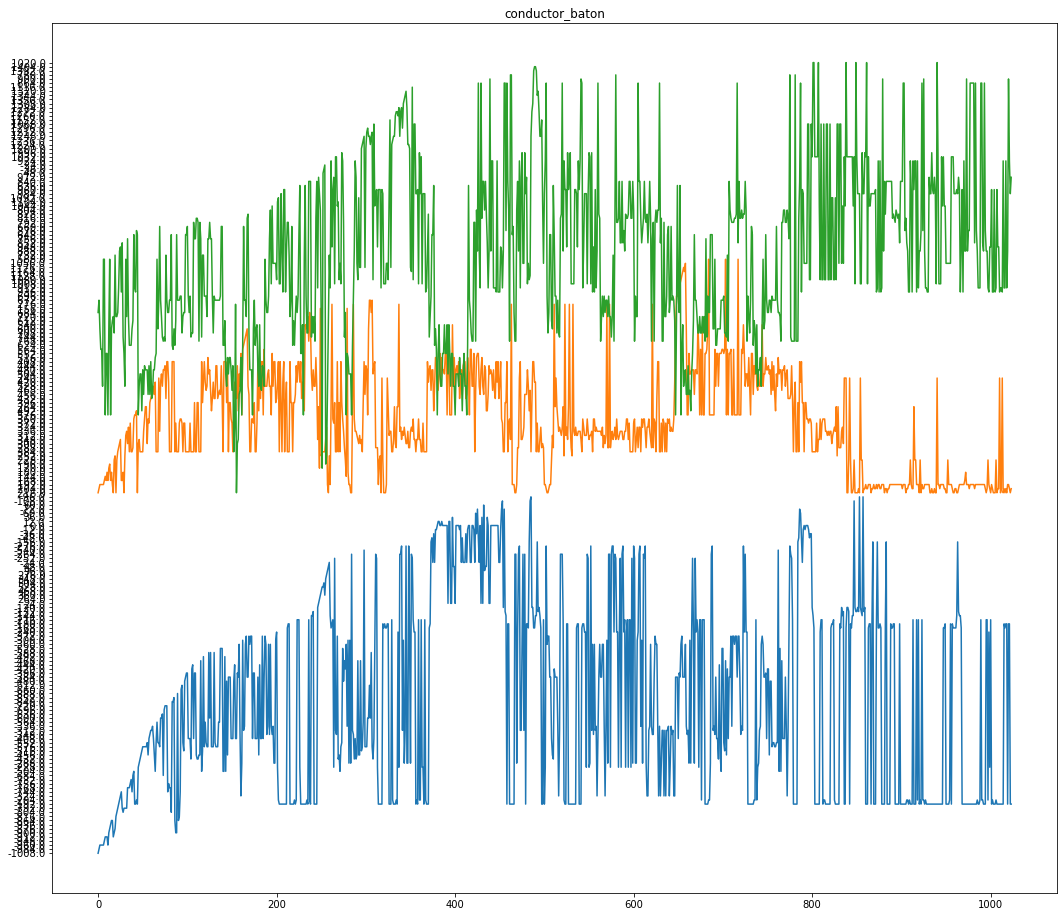

In [126]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

path_data = "epoch-15"
array_data = np.empty([0,1024,3])
array_label = np.empty([0])
for root, dirs, files in os.walk(path_data):
    for file in files:
        print("Reading {}".format(os.path.join(root,file)))
        with open(os.path.join(root,file)) as f:
          for chunk in pandas.read_csv(f, sep=',',comment='#', error_bad_lines=False, chunksize=1025):
              trimmed_chunk = np.expand_dims(chunk.iloc[:-1],axis=0) # has dimensions (1024,3) should be (1,1024,3)
              array_data = np.append(array_data,trimmed_chunk,axis=0) # We omit the ax,ay,az row
              array_label = np.append(array_label,file.split('.')[0])

sample = 0
fig = plt.figure(figsize=(18, 16))
plt.plot(array_data[sample,:,0])
plt.plot(array_data[sample,:,1])
plt.plot(array_data[sample,:,2])
plt.title(array_label[sample])



In [0]:
pandas.DataFrame(array_data[0]).to_excel("excel.xls")

(27,)